<a href="https://colab.research.google.com/github/supermansam/EqWATER/blob/master/Leak_Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# S is the increment in confidence for each type of leak l
#mean is the 
s = 0
def loglikelihood(x, mean, l):
  for i in range(len(x)):
    s = s + math.max(math.log(x[i] - mean - l) - math.log(x - mean), 0)
  
  return s

In [0]:
leakDistribution = []
Confidence = []
for i in range(len(leakDistribution)):
  Confidence[i] = loglikelihood(x, mean, l)

In [0]:
#Data taken from Google Drive
from google.colab import drive
#!pip install plotnine

In [0]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
import numpy as np

In [0]:
fixData = pd.read_csv("/content/drive/My Drive/RA_IISc/Leak_Detection/RA_leak_data/Leak_Data.csv")
#leakDates = fixData['date_leak_']
#leakDates[20] = '19/01/18 21:35'
#leakDates[22] = '08/01/18 16:03'
#leakDates


In [0]:
leakDates = fixData['date_leak_']
leakDates[20] = '19/01/18 21:35'
leakDates[22] = '08/01/18 16:03'
#leakDates

In [0]:
datesAndTime = leakDates.values.tolist()
#dates

In [0]:
#from google.colab import files
#!cd drive

In [0]:
#a = datesAndTime[0].split(' ')
#a[1].replace(':',".")

dates = []
times = []
for string in datesAndTime:
  a = string.split(' ')
  dates.append(a[0])
  times.append(float(a[1].replace(':',".")))



In [0]:
dates_new = []
for date in dates:
  dates_new.append(date[0:6] + '20' + date[6:])
#dates_new  


In [0]:
SW4DM0101 = pd.read_csv("/content/drive/My Drive/RA_IISc/Leak_Detection/RA_leak_data/SW4DM0101.csv")
SW4DM0102 = pd.read_csv("/content/drive/My Drive/RA_IISc/Leak_Detection/RA_leak_data/SW4DM0102.csv")
SW4DM0103 = pd.read_csv("/content/drive/My Drive/RA_IISc/Leak_Detection/RA_leak_data/SW4DM0103.csv")

In [0]:
#For SW4DM0101
pressures = []
netflows = []
temp = 0
templist = []
#df1 = pd.DataFrame(columns=['DMA', 'Leak_date_time', 'Before','After', 'Interval'])
#df1New = pd.DataFrame(columns=['DMA', 'Leak_date_time', 'Before','After', 'Interval'])
#df1.append({'DMA':'SW4DM0101', 'Leak_date_time':'26/03/2018 20.16', 'Before':20000, 'After':21000, 'Interval':1 })
dfFlow = pd.DataFrame(columns=['DMA', 'Leak_date_time', 'Net_Flow','Status' ,'Interval'])
for i in range(len(dates_new)):
  print('date - %s' % dates_new[i])
  for j in range(len(SW4DM0101['Date'])):
    #if(j%10000 == 0):
      #print(SW4DM0101['Date'][j] + str(SW4DM0101['Net Flow (mᶾ)'][j])+ str(times[i]))
    if(SW4DM0101['Date'][j] == dates_new[i]):
      temp = int(times[i]/1)
      point = j + temp*4 + int((times[i]-temp)*100/14.9)
      print('inside if condition')
      print(SW4DM0101['Date'][j] +' '+ SW4DM0101['Time'][j] +' '+str(SW4DM0101['Net Flow (mᶾ)'][j])+' '+ str(dates_new[i])+' '+str(times[i])+' '+str(SW4DM0101['Net Flow (mᶾ)'][point]))
      for m in range(10):
        templist.append([SW4DM0101['Net Flow (mᶾ)'][point-m*96],SW4DM0101['Net Flow (mᶾ)'][point+1+m*96]])
        #df1 = df1.append({'DMA':'SW4DM0101','Leak_date_time':dates_new[i]+' '+str(times[i]),'Before':SW4DM0101['Net Flow (mᶾ)'][point-m*96],'After':SW4DM0101['Net Flow (mᶾ)'][point+1+m*96],'Interval':m},ignore_index=True)
        #df1New = df1New.append({'DMA':'SW4DM0101','Leak_date_time':dates_new[i]+' '+str(times[i]),'Before':(SW4DM0101['Net Flow (mᶾ)'][point-m*96]-SW4DM0101['Net Flow (mᶾ)'][point-(m+1)*96]),'After':(SW4DM0101['Net Flow (mᶾ)'][point+1+(m+1)*96]-SW4DM0101['Net Flow (mᶾ)'][point+1+m*96]),'Interval':m},ignore_index=True)
        dfFlow = dfFlow.append({'DMA':'SW4DM0101','Leak_date_time':dates_new[i]+' '+str(times[i]),'Net_Flow':(SW4DM0101['Net Flow (mᶾ)'][point-m*96]-SW4DM0101['Net Flow (mᶾ)'][point-(m+1)*96]),'Status':'Before','Interval':m},ignore_index=True)
        dfFlow = dfFlow.append({'DMA':'SW4DM0101','Leak_date_time':dates_new[i]+' '+str(times[i]),'Net_Flow':(SW4DM0101['Net Flow (mᶾ)'][point+1+(m+1)*96]-SW4DM0101['Net Flow (mᶾ)'][point+1+m*96]),'Status':'After','Interval':m},ignore_index=True)
      netflows.append(templist)
      templist = []
      temp = 0
      break
    elif j>= len(SW4DM0101['Date']):
      print('date of leak fix %s not found'% dates[i])

In [0]:
#For SW4DM0102
pressures_2 = []
netflows_2 = []
temp = 0
templist = []
dfFlow2 = pd.DataFrame(columns=['DMA', 'Leak_date_time', 'Net_Flow','Status' ,'Interval'])
for i in range(len(dates_new)):
  print('date - %s' % dates_new[i])
  for j in range(len(SW4DM0102['Date'])):
    #if(j%10000 == 0):
      #print(SW4DM0102['Date'][j] + str(SW4DM0102['Net Flow (mᶾ)'][j])+ str(times[i]))
    if(SW4DM0102['Date'][j] == dates_new[i]):
      temp = int(times[i]/1)
      point = j + temp*4 + int((times[i]-temp)*100/14.9)
      print('inside if condition')
      print(SW4DM0102['Date'][j] +' '+ SW4DM0102['Time'][j] +' '+str(SW4DM0102['Net Flow (mᶾ)'][j])+' '+ str(dates_new[i])+' '+str(times[i])+' '+str(SW4DM0102['Net Flow (mᶾ)'][point]))
      for m in range(10):
        templist.append([SW4DM0102['Net Flow (mᶾ)'][point-m*96],SW4DM0102['Net Flow (mᶾ)'][point+1+m*96]])
        dfFlow2 = dfFlow2.append({'DMA':'SW4DM0102','Leak_date_time':dates_new[i]+' '+str(times[i]),'Net_Flow':(SW4DM0102['Net Flow (mᶾ)'][point-m*96]-SW4DM0102['Net Flow (mᶾ)'][point-(m+1)*96]),'Status':'Before','Interval':m},ignore_index=True)
        dfFlow2 = dfFlow2.append({'DMA':'SW4DM0102','Leak_date_time':dates_new[i]+' '+str(times[i]),'Net_Flow':(SW4DM0102['Net Flow (mᶾ)'][point+1+(m+1)*96]-SW4DM0102['Net Flow (mᶾ)'][point+1+m*96]),'Status':'After','Interval':m},ignore_index=True)
      netflows_2.append(templist)
      templist = []
      temp = 0
      break
    elif j>= len(SW4DM0102['Date']):
      print('date of leak fix %s not found'% dates[i])

In [0]:
#For SW4DM0103
pressures_3 = []
netflows_3 = []
temp = 0
templist = []
dfFlow3 = pd.DataFrame(columns=['DMA', 'Leak_date_time', 'Net_Flow','Status' ,'Interval'])
for i in range(len(dates_new)):
  print('date - %s' % dates_new[i])
  for j in range(len(SW4DM0103['Date'])):
    #if(j%10000 == 0):
      #print(SW4DM0103['Date'][j] + str(SW4DM0103['Net Flow (mᶾ)'][j])+ str(times[i]))
    if(SW4DM0103['Date'][j] == dates_new[i]):
      temp = int(times[i]/1)
      point = j + temp*4 + int((times[i]-temp)*100/14.9)
      print('inside if condition')
      print(SW4DM0103['Date'][j] +' '+ SW4DM0103['Time'][j] +' '+str(SW4DM0103['Net Flow (mᶾ)'][j])+' '+ str(dates_new[i])+' '+str(times[i])+' '+str(SW4DM0103['Net Flow (mᶾ)'][point]))
      for m in range(10):
        templist.append([SW4DM0103['Net Flow (mᶾ)'][point-m*96],SW4DM0103['Net Flow (mᶾ)'][point+1+m*96]])
        dfFlow3 = dfFlow3.append({'DMA':'SW4DM0103','Leak_date_time':dates_new[i]+' '+str(times[i]),'Net_Flow':(SW4DM0103['Net Flow (mᶾ)'][point-m*96]-SW4DM0103['Net Flow (mᶾ)'][point-(m+1)*96]),'Status':'Before','Interval':m},ignore_index=True)
        dfFlow3 = dfFlow3.append({'DMA':'SW4DM0103','Leak_date_time':dates_new[i]+' '+str(times[i]),'Net_Flow':(SW4DM0103['Net Flow (mᶾ)'][point+1+(m+1)*96]-SW4DM0103['Net Flow (mᶾ)'][point+1+m*96]),'Status':'After','Interval':m},ignore_index=True)              
      netflows_3.append(templist)
      templist = []
      temp = 0
      break
    elif j>= len(SW4DM0103['Date']):
      print('date of leak fix %s not found'% dates[i])

date - 26/03/2018
inside if condition
26/03/2018 00:00 2090810.0 26/03/2018 20.16 2090609.0
date - 26/03/2018
inside if condition
26/03/2018 00:00 2090810.0 26/03/2018 20.21 2090609.0
date - 14/03/2018
inside if condition
14/03/2018 00:00 2084882.0 14/03/2018 16.1 2084740.0
date - 14/03/2018
inside if condition
14/03/2018 00:00 2084882.0 14/03/2018 16.17 2084738.0
date - 13/03/2018
inside if condition
13/03/2018 00:00 2083840.0 13/03/2018 14.56 2084932.0
date - 23/01/2018
inside if condition
23/01/2018 00:00 2056474.0 23/01/2018 17.47 2056349.0
date - 06/01/2018
inside if condition
06/01/2018 00:00 2044917.0 06/01/2018 17.1 2046509.0
date - 08/01/2018
inside if condition
08/01/2018 00:00 2046593.0 08/01/2018 9.21 2047489.0
date - 05/01/2018
inside if condition
05/01/2018 00:00 2044600.0 05/01/2018 16.21 2044498.0
date - 21/12/2017
inside if condition
21/12/2017 00:00 2034033.0 21/12/2017 17.22 2035204.0
date - 21/12/2017
inside if condition
21/12/2017 00:00 2034033.0 21/12/2017 11.19 2

In [0]:
#temp = int(20.15/1)
#point = 10 + temp*4 + int((20.15-temp)*100/14.9)
#str(SW4DM0101['Date'][0] + dates[0]+str(times[0]))
#for date in dates:
#  print(date + ' new date below')
#  print(date[0:6] + '20' + date[6:])/////////////////
#print(str(len(netflows_3))+ ' ' +str(len(netflows_2))+ ' ' +str(len(netflows_3)))
df1New.head()

,DMA,Leak_date_time,Before,After,Interval
0,SW4DM0101,26/03/2018 20.16,1206.0,1213.0,0
1,SW4DM0101,26/03/2018 20.16,1218.0,1202.0,1
2,SW4DM0101,26/03/2018 20.16,1202.0,1226.0,2
3,SW4DM0101,26/03/2018 20.16,1213.0,1214.0,3
4,SW4DM0101,26/03/2018 20.16,1209.0,1212.0,4


In [0]:
#Now look at barplots, histograms and boxplots
#Using plotnine
from plotnine import *
import matplotlib as plt
#from plotnine.data import mpg

#(ggplot(mpg)
# + aes(x='displ', y='hwy', color='class')
# + geom_point()
# + labs(title='Engine Displacement vs. Highway Miles per Gallon', x='Engine Displacement, in Litres', y='Highway Miles per Gallon')
#)


In [0]:
#from mpl_toolkits.mplot3d import Axes3D
#a = np.array(netflows)
#a.shape
#fig = plt.figure()
#ax = fig.add_subplot(111, projection='3d')
#scatter(a[], ys, zs=0, zdir='z', s=20)
#dfObj = pd.DataFrame(columns=['DMA', 'Leak_date_time', 'Before','After', 'Interval'])
#dfObj = dfObj.append({'DMA':'SW4DM0101', 'Leak_date_time':'26/03/2018 20.16', 'Before':20000, 'After':21000, 'Interval':1 },ignore_index = True )
#dfObj.append({'User_ID': 23, 'UserName': 'Riti', 'Action': 'Login'}, ignore_index=True)
#(ggplot(df1)
#+aes(x = 'Leak_date_time', y = 'Before')
#+geom_bar(stat='identity') )////////////////////////
#ggplot(df1New, aes(x='Interval',y='Before')) + geom_bar(size=20,stat = "identity") + facet_wrap(['Leak_date_time'])////////

#ggplot(dfFlow , aes(x = 'Interval', y = 'Net_Flow')) + geom_bar(size=10,stat = "identity") + facet_grid('Leak_date_time~Status')
dfFlow3

,DMA,Leak_date_time,Net_Flow,Status,Interval
0,SW4DM0103,26/03/2018 20.16,-237.0,Before,0
1,SW4DM0103,26/03/2018 20.16,1042.0,After,0
2,SW4DM0103,26/03/2018 20.16,1178.0,Before,1
3,SW4DM0103,26/03/2018 20.16,-273.0,After,1
4,SW4DM0103,26/03/2018 20.16,-240.0,Before,2
5,SW4DM0103,26/03/2018 20.16,841.0,After,2
6,SW4DM0103,26/03/2018 20.16,1025.0,Before,3
7,SW4DM0103,26/03/2018 20.16,-428.0,After,3
8,SW4DM0103,26/03/2018 20.16,-124.0,Before,4
9,SW4DM0103,26/03/2018 20.16,1060.0,After,4


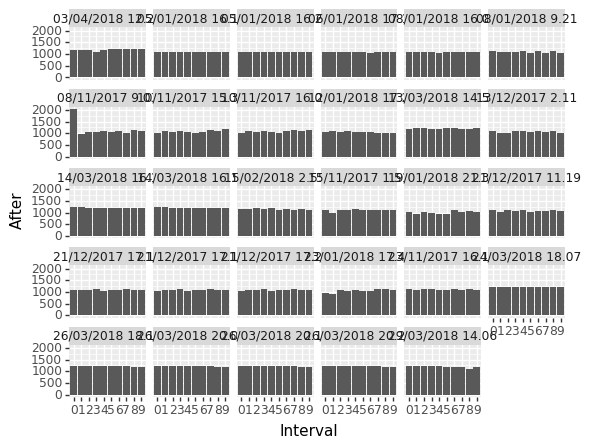

<ggplot: (8747028617487)>

In [0]:
#ggplot(df1New, aes(x='Interval',y='After')) + geom_bar(size=20,stat = "identity") + facet_wrap(['Leak_date_time'])

In [0]:
#export_csv = dfFlow.to_csv (r'/content/drive/My Drive/RA_IISc/Leak_Detection/RA_leak_data/DMA0101N.csv', index = None, header=True)
#export_csv = dfFlow2.to_csv (r'/content/drive/My Drive/RA_IISc/Leak_Detection/RA_leak_data/DMA0102N.csv', index = None, header=True)
#export_csv = dfFlow3.to_csv (r'/content/drive/My Drive/RA_IISc/Leak_Detection/RA_leak_data/DMA0103N.csv', index = None, header=True)